##подключение пакетов 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow.keras as kr
import pandas as pd
import seaborn as sns
#from google.colab import drive

%matplotlib inline

In [3]:
# from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/5/Beep-09.ogg").play()')
#from google.colab import output
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [4]:
#pip install keras_tuner

In [5]:
#import keras_tuner as kt

In [6]:
import zipfile
from tqdm.notebook import tqdm_notebook

##извлечение файлов и нормировка


In [7]:
#f=open(r"/content/drive/MyDrive/Colab Notebooks/data from collab.zip",'r')
#file=zipfile.ZipFile(f)
with zipfile.ZipFile("data from collab.zip") as zip_data:
  zip_data.printdir()
  zip_data.extractall()
  #output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

File Name                                             Modified             Size
fe.dat                                         2021-09-10 23:20:44      2437897
he.dat                                         2021-09-10 23:20:42      2527546
n.dat                                          2021-09-10 23:20:40      2527481
p.dat                                          2021-09-10 23:20:30      2437425
p.paramnames                                   2021-09-10 23:21:46          134
task5_gamma.dat                                2021-09-10 23:21:38      3844863
task5_p.dat                                    2021-09-10 23:21:34      3842405
task5_p.paramnames                             2021-09-10 23:21:44          134
task5_unknown.dat                              2021-09-10 23:21:24       640383
unknown1.dat                                   2021-09-10 23:21:12       609402
unknown2.dat                                   2021-09-10 23:21:14       625251
unknown3.dat                            

In [8]:
paramnames=open("p.paramnames")
name=paramnames.readlines()
print(name)
file_fe=pd.read_csv("fe.dat",sep=' ',names=name)
file_he=pd.read_csv("he.dat",sep=' ',names=name)
file_n=pd.read_csv("n.dat",sep=' ',names=name)
file_p=pd.read_csv("p.dat",sep=' ',names=name)
file_n[:3]

['theta\n', 'S800\n', 'ndet\n', 'ndet_excluded\n', 'chi2\n', 'a_Linsley\n', 'AoP\n', 'AoP_slope\n', 'S3\n', 'S4.5\n', 'total_signal\n', 'asymm\n', 'npeaks\n', 'npeaks_highest\n', 'asymmpeaks_u\n', 'asymmpeaks_l\n']


,theta\n,S800\n,ndet\n,ndet_excluded\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n,asymm\n,npeaks\n,npeaks_highest\n,asymmpeaks_u\n,asymmpeaks_l\n
0,30.24,31.9005,12,0,0.78576,0.473569,400.123,-349.005,1.964063,3.017109,165.525,0.297806,66,11,15,10
1,30.96,43.6306,10,0,1.14002,0.646790,396.505,-284.943,1.828066,2.493158,388.350,0.126819,76,11,11,7
2,23.65,39.2666,9,0,1.03139,0.561117,466.047,-549.563,1.757809,1.493493,1044.720,0.101842,72,6,12,8


In [9]:
all_file=pd.concat([file_fe,file_he,file_p,file_n])#,keys=['fe','he','p','n'])
all_file=all_file.sample(frac=1)

In [10]:
mean=all_file.mean()
#print(mean)
std=all_file.std()
#print(std)
new_all_file=all_file-mean
new=new_all_file.div(std,axis="columns")
all_file=new

In [11]:
max_=all_file.abs()
max_abs=max_.max()
#print(std)
new=all_file.div(max_abs,axis="columns")
all_file=new


In [12]:
all_file.abs().max()


theta\n             1.0
S800\n              1.0
ndet\n              1.0
ndet_excluded\n     1.0
chi2\n              1.0
a_Linsley\n         1.0
AoP\n               1.0
AoP_slope\n         1.0
S3\n                1.0
S4.5\n              1.0
total_signal\n      1.0
asymm\n             1.0
npeaks\n            1.0
npeaks_highest\n    1.0
asymmpeaks_u\n      1.0
asymmpeaks_l\n      1.0
dtype: float64

In [13]:
# def range_abs_1(file):
#   max_=file.abs()
#   max_abs=max_.max()
#   print(max_abs)
#   new=file.div(max_abs,axis="columns")
#   return ()
# range_abs_1(all_file)
# all_file.abs().max()

In [14]:
corr_name=name[:2]+name[4:11]
new=all_file[corr_name]
all_file=new

In [15]:
num=len(all_file)
print(num)
frac_train=0.8    #80%
num_train=int(num*0.9)
print(num_train,"number train")
num_test=num-num_train
train_data=all_file[:num_train]
test_data=all_file[num_train:]
train_data=train_data.to_numpy()

test_data=test_data.to_numpy()
train_data[0]
all_file.shape

80000
72000 number train


(80000, 9)

In [16]:
# mean=all_file.mean()
# print(type (all_file))
# print(mean.shape)
# std=all_file.std()
# print(std.shape)
# new_all_file=all_file-mean
# new=new_all_file.div(std,axis="columns")
# all_file=new

нормировка (0,1)

In [17]:
# corr_name=name[:2]+name[4:11]
# new=all_file[corr_name]
# all_file=new

## Корреляция


,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
theta\n,1.000000,-0.415539,0.061855,-0.129277,-0.366602,0.262355,0.483501,0.313795,-0.011006
S800\n,-0.415539,1.000000,-0.152151,-0.152874,0.613344,-0.220324,-0.311954,-0.162651,0.237589
chi2\n,0.061855,-0.152151,1.000000,-0.299145,-0.146826,0.366479,0.398954,0.461997,-0.039472
a_Linsley\n,-0.129277,-0.152874,-0.299145,1.000000,-0.083918,-0.376202,-0.375936,-0.421265,-0.091692
AoP\n,-0.366602,0.613344,-0.146826,-0.083918,1.000000,-0.628981,-0.312511,-0.228431,0.079558
AoP_slope\n,0.262355,-0.220324,0.366479,-0.376202,-0.628981,1.000000,0.495785,0.516001,0.030793
S3\n,0.483501,-0.311954,0.398954,-0.375936,-0.312511,0.495785,1.000000,0.886296,0.231495
S4.5\n,0.313795,-0.162651,0.461997,-0.421265,-0.228431,0.516001,0.886296,1.000000,0.016295
total_signal\n,-0.011006,0.237589,-0.039472,-0.091692,0.079558,0.030793,0.231495,0.016295,1.000000


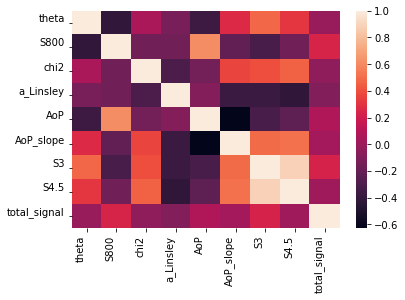

In [18]:
def correlation(df, show=False):
  corr_matrix=df.corr()
  if show:
    sns.heatmap(corr_matrix)
  return (corr_matrix)
corr_real=correlation(all_file,show=True)
corr_real

отрисовка произвольных 20000 значений друг от друга. по диагонале отрисовка гистограм

In [19]:
corr_parametrs=name[0:6]+name[8:10]
#print(corr_parametrs)
#print(axs)
#axs[1][0].plot(np.array([0,1,2,3]),np.array([0,2,4,6]))
def corr_plot(data,param):
  n=len(param)
  fig,axs=plt.subplots(n,n,figsize=(50,32))
  for i in range(n):
    x_name=param[i]
    x=data[x_name][:20000]
    #print(len(x))
    for j in range(n):
      y_name=param[j]
      y=data[y_name][:20000]
      #print(len(y))
      if i!=j:
        axs[i][j].plot(x,y,'+')
        axs[i][j].set_xlabel(x_name)
        axs[i][j].set_ylabel(y_name)
      else:
        axs[i][i].hist(x,bins=20,color='#AA0000')
#corr_plot(all_file[:20000],corr_name)


# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [20]:
noise_dim=500
l=len(corr_name)
l

9

## создание гениратора и дискриминатора 

In [21]:
def abs_1(x):# делает тензор в диапазонй -1:1
  a=tf.reduce_max(tf.abs(x))
  x=x/a
  return (x)


In [22]:
def Generator_model(): 
  # model = tf.keras.Sequential()
  # model.add(tf.keras.layers.Dense(units=100,activation=tf.keras.activations.tanh,input_shape=(noise_dim,)))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh))

  input_tensor=tf.keras.Input(shape=(noise_dim,))
  #x=tf.keras.layers.Dense(units=100,use_bias=False,activation=tf.keras.activations.tanh)(input_tensor)
  #x=tf.keras.layers.BatchNormalization()(x)
  #x=abs_1(x)
  x=tf.keras.layers.Dense(units=40,use_bias=False)(input_tensor)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.activations.tanh(x)
  #x=abs_1(x)
  x=tf.keras.layers.Dense(units=40,use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.activations.tanh(x)

  x=tf.keras.layers.Dense(units=20,use_bias=False)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.activations.tanh(x)
    
  x=tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh)(x)

  model= tf.keras.Model(input_tensor,x)
  return model

In [23]:
# def Generator_model(): 
#   input_tensor=tf.keras.Input(shape=(noise_dim,))
#   x=tf.keras.layers.Dense(units=50,use_bias=False)(input_tensor)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=40,use_bias=False)(x)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=30,use_bias=False)(x)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=20,use_bias=False)(x)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   #x=tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh)(x)
#   #x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh)(x)

#   model= tf.keras.Model(input_tensor,x)
#   return model

In [24]:
def Discriminator_model():
  # model=tf.keras.Sequential()
  # #model.add(tf.keras.layers.Dense(units=16,activation=tf.keras.activations.relu))
  # model.add(tf.keras.layers.Dense(units=l*l,activation=tf.keras.activations.relu,input_shape=(l,)))
  # model.add(tf.keras.layers.Dense(units=32,activation=tf.keras.activations.relu))
  # #model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=20,activation=tf.keras.activations.relu))
  # model.add(tf.keras.layers.Dense(units=20,activation=tf.keras.activations.relu))
  # #model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid))
  input_tensor=tf.keras.Input(shape=(l,))
  x=tf.keras.layers.Dense(units=l*l)(input_tensor)
#   x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)
  x=tf.keras.layers.Dense(units=32)(x)
#   x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)
  x=tf.keras.layers.Dense(units=20)(x)
#   x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)
  x=tf.keras.layers.Dense(units=20)(x)
#   x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)
  # x=tf.keras.layers.Dense(units=10)(x)
  # x=tf.keras.layers.ReLU()(x)
  x=tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(x)
  model= tf.keras.Model(input_tensor,x)
  return model

In [25]:
s=tf.constant([[1,2],[3,4,]]).shape
tf.random.normal(shape=(l,))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([ 0.14003386, -0.93180996, -0.42193124,  1.4696074 ,  0.1213829 ,
        0.40390563,  0.02911406,  1.0814998 , -0.08746819], dtype=float32)>

In [46]:


generator = Generator_model()
discriminator=Discriminator_model()
batch=32

noise = tf.random.normal(shape=(batch,noise_dim))

# print(noise)
generated_data = generator(noise, training=False)
print(generated_data.shape,'generated_data')
# #print(np.array(list(generated_data)))

# #g=np.array(g)
# print(generated_data)
# print(generated_data.shape)
decision = discriminator(generated_data)
print (decision)

(32, 9) generated_data
tf.Tensor(
[[0.5016874 ]
 [0.5101498 ]
 [0.51311594]
 [0.5157689 ]
 [0.5066455 ]
 [0.51090854]
 [0.48197716]
 [0.47098964]
 [0.495073  ]
 [0.5035816 ]
 [0.5017503 ]
 [0.4998412 ]
 [0.4982853 ]
 [0.5052846 ]
 [0.5076515 ]
 [0.506938  ]
 [0.50886774]
 [0.4621737 ]
 [0.50705606]
 [0.504827  ]
 [0.5007104 ]
 [0.5097494 ]
 [0.5008081 ]
 [0.4648237 ]
 [0.51492375]
 [0.5178899 ]
 [0.501634  ]
 [0.50723416]
 [0.507313  ]
 [0.50606835]
 [0.5057678 ]
 [0.48647648]], shape=(32, 1), dtype=float32)


In [27]:
discriminator=Discriminator_model()

In [28]:
discriminator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 81)                810       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 81)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2624      
_________________________________________________________________
re_lu_5 (ReLU)               (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                660       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 20)                0   

In [29]:
generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 40)                20000     
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
tf.math.tanh (TFOpLambda)    (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
tf.math.tanh_1 (TFOpLambda)  (None, 40)                0     

## loss and generat_new_data


In [30]:
def generat_new_data(num,batch=1,name=corr_name):
  #num - size dataset
  noise=tf.random.normal(shape=(batch,noise_dim))
  data=generator(noise)
  data=data.numpy()
  df=pd.DataFrame(data,columns=name)
  for i in range(1,num):
    noise=tf.random.normal(shape=(batch,noise_dim))
    data=generator(noise)
    data=data.numpy()
    d=pd.DataFrame(data,columns=name)
    #print(d)
    df=df.append(d)
  return (df)

print(generat_new_data(5))


    theta\n    S800\n    chi2\n  a_Linsley\n     AoP\n  AoP_slope\n      S3\n  \
0 -0.162024 -0.887309  0.359375    -0.106324 -0.615199     0.571795 -0.601479   
0  0.145002  0.127803 -0.230739    -0.229875 -0.047234     0.817706 -0.727892   
0 -0.568466 -0.766548  0.233952    -0.089612 -0.513221    -0.690015  0.582014   
0  0.504572 -0.353353  0.504436     0.709198 -0.407520    -0.004353 -0.076905   
0  0.587200  0.809092  0.189288     0.397831 -0.078440     0.535105 -0.475287   

     S4.5\n  total_signal\n  
0 -0.015951        0.227212  
0  0.771981       -0.009794  
0 -0.467138        0.177927  
0 -0.087882       -0.808051  
0  0.866580        0.026501  


In [47]:
def corr_loss(corr_real,weight,number,data):#функция вычисляющая ошибки корреляции 
    if data is None:
        f_data=generat_new_data(number)
    else:
        f_data=data
    fake_corr=correlation(f_data)
    loss=sum(tf.keras.losses.mean_squared_error(corr_real,fake_corr))/l
    return(weight*loss)
corr_loss(corr_real,1,8,generat_new_data(8))


<tf.Tensor: shape=(), dtype=float64, numpy=0.22775913841905235>

In [48]:
def discriminator_loss(real_data, fake_data):
    real_loss = tf.reduce_mean(real_data)
    fake_loss = tf.reduce_mean(fake_data)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_data):
    return -tf.reduce_mean(fake_data)

In [33]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    # real_loss = cross_entropy(tf.ones_like(real_output), real_output)/batch
    # fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)/batch
    real_loss=sum(tf.keras.losses.mean_squared_error(tf.ones_like(real_output), real_output))/batch
    fake_loss=sum(tf.keras.losses.mean_squared_error(tf.zeros_like(fake_output), fake_output))/batch
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
  #return cross_entropy(tf.ones_like(fake_output), fake_output)
  return sum(tf.keras.losses.mean_squared_error(tf.ones_like(fake_output), fake_output))/batch
generator_optimizer = tf.keras.optimizers.RMSprop(1e-4,clipnorm=0.1)
discriminator_optimizer = tf.keras.optimizers.RMSprop(1e-4,clipnorm=0.1)

## train

## попытки Batch

In [34]:

# def train_step(data,show_disc_loss=False):
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    

#     noise=tf.random.normal([1, noise_dim])# 
#     fake_data=generator(noise)

#     real_output=discriminator(data,training=True)
#     fake_output=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)
#     #print(gen_loss)
#     #print(generator.trainable_variables,'gfgfgfgfg')
#     #disc_loss=tf.keras.losses.mean_squared_error()
#   #tensorflow
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
#   if show_disc_loss:
#     return disc_loss
#   #discriminator.compile(optimizer=discriminator_optimizer,loss=disc_loss)
#   #generator.compile(optimizer=generator_optimizer,loss=gen_loss)





In [35]:
# np.zeros((1,3))

In [36]:
# def train_step_3(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     real_output=np.zeros((batch))
#     fake_output=np.zeros((batch))
#     for i in range(batch):
#       noise=tf.random.normal([1, 1000])# 
#       fake_data=generator(noise)

#       real_output[i]=discriminator(data[i],training=True)
#       fake_output[i]=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)

#   gen_loss=sum(batch_gen_loss)/batch
#   disc_loss=sum(batch_disc_loss)/batch
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [37]:
# epochs=1
# disc_loss_list=[]
# #corr_file= open("corr_file.csv',mode='w') 
# def train(epochs,train_data):
#   with pd.ExcelWriter('output.xlsx',mode='wa') as writer:
#     for i in tqdm_notebook(range(epochs),desc="all progrss"):
#       k=0
#       for step_data in tqdm_notebook(train_data,desc="in epoch number:"+str(i)):
#         k+=1
#         #print(step_data.shape)
#         reshape_step_data=np.reshape(step_data,(1,16))
#         #print(reshape_step_data)
#         #print(reshape_step_data.shape)
#         disc_loss=train_step(reshape_step_data,show_disc_loss=True)
#         disc_loss_list.append(disc_loss)
#         # вывод каждые 8000 матрицу корреляции и щапись в файл
#         if (k%8000)==0:
#           sheet_name='sheet'+(str (k//8000))
#           corr_dataset=generat_new_data(1000)
#           matrix=correlation(corr_dataset)
#           print(matrix)
#           matrix.to_excel(writer,sheet_name=sheet_name)
          



# train(epochs,train_data[:500])
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [38]:
# print(len(disc_loss_list))
# true_data=all_file[:2]
# print(all_file[:2],'true_data')
# n=np.random.normal(size=(1,500))
# fake=generator(n)
# print(fake,'fake')
# her=np.random.normal(0,size=(1,16))
# print(fake,'fake')
# predict=discriminator(true_data.to_numpy())
# print(predict,'predict')
# fake_predict=discriminator(her)
# print(fake_predict,'fake_predict')
# #disc_loss_list=[]
# #print(disc_loss_list[1000])
# plt.plot(disc_loss_list[:700])

In [39]:
def train_step_batch(data,batch,show_loss=False):#len(data)=batch
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
      noise=tf.random.normal(shape=(batch,noise_dim))
      fake_data=generator(noise)

      real_output=discriminator(data,training=True)
      fake_output=discriminator(fake_data,training=True)

      disc_loss=discriminator_loss(real_output,fake_output)
      gen_loss=generator_loss(fake_output)
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  #print(gradients_of_discriminator,'\n\n\n')
  #print(discriminator.trainable_variables,'\n\n\n')

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  if show_loss:
    return ((disc_loss,gen_loss))


внизу прописан batch. не уверен что он работатет правильно, но оно работает. генератор получает шум (batch,noise_dim) дискриминатор получает данные в пакете размером batch.

In [40]:
discriminator=Discriminator_model()

In [51]:
batch=32
# disc_loss_list=[] 
# gen_loss_list=[]
epochs=5
#corr_file= open("corr_file.csv',mode='w') 
def train_2(epochs,train_data,batch):
  #with pd.ExcelWriter('output_batch.xlsx',mode='wa') as writer:
    for i in tqdm_notebook(range(epochs),desc="all progrss"):
      k=0
      lim=len(train_data)//batch
      bar=lim//8
      for num in tqdm_notebook(range (0,len(train_data),batch),desc="in epoch number:"+str(i+1)):
        k+=1
        step_data=train_data[num:num+batch]
        #step_data+=0.1*np.random.normal(size=(step_data.shape))
        #print(step_data.shape)
        reshape_step_data=np.reshape(step_data,(batch,l))
        (disc_loss,gen_loss)=train_step_batch(reshape_step_data,batch,show_loss=True)
        disc_loss_list.append(disc_loss)
        gen_loss_list.append(gen_loss)
        # if (k%bar)==0:
        #   sheet_name='epoch number'+(str (i+1))+'list number'+(str (k//bar))
        #   corr_dataset=generat_new_data(1000,batch=batch)
        #   matrix=correlation(corr_dataset)
        #   #print(matrix)
        #   matrix.to_excel(writer,sheet_name=sheet_name)
          

train_2(epochs,train_data,batch)
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

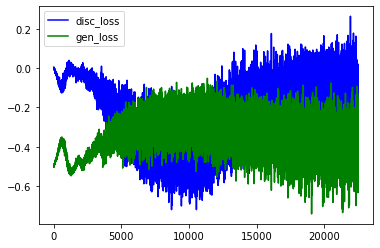

In [52]:
fig=plt.figure()
plt.plot(disc_loss_list,'b')
plt.plot(gen_loss_list,'g')
plt.legend(['disc_loss','gen_loss'])
#plt.savefig(" wisthout noise mse.pdf")
#generat_new_data(4)

['theta\n', 'S800\n', 'chi2\n', 'a_Linsley\n', 'AoP\n', 'AoP_slope\n', 'S3\n', 'S4.5\n', 'total_signal\n']


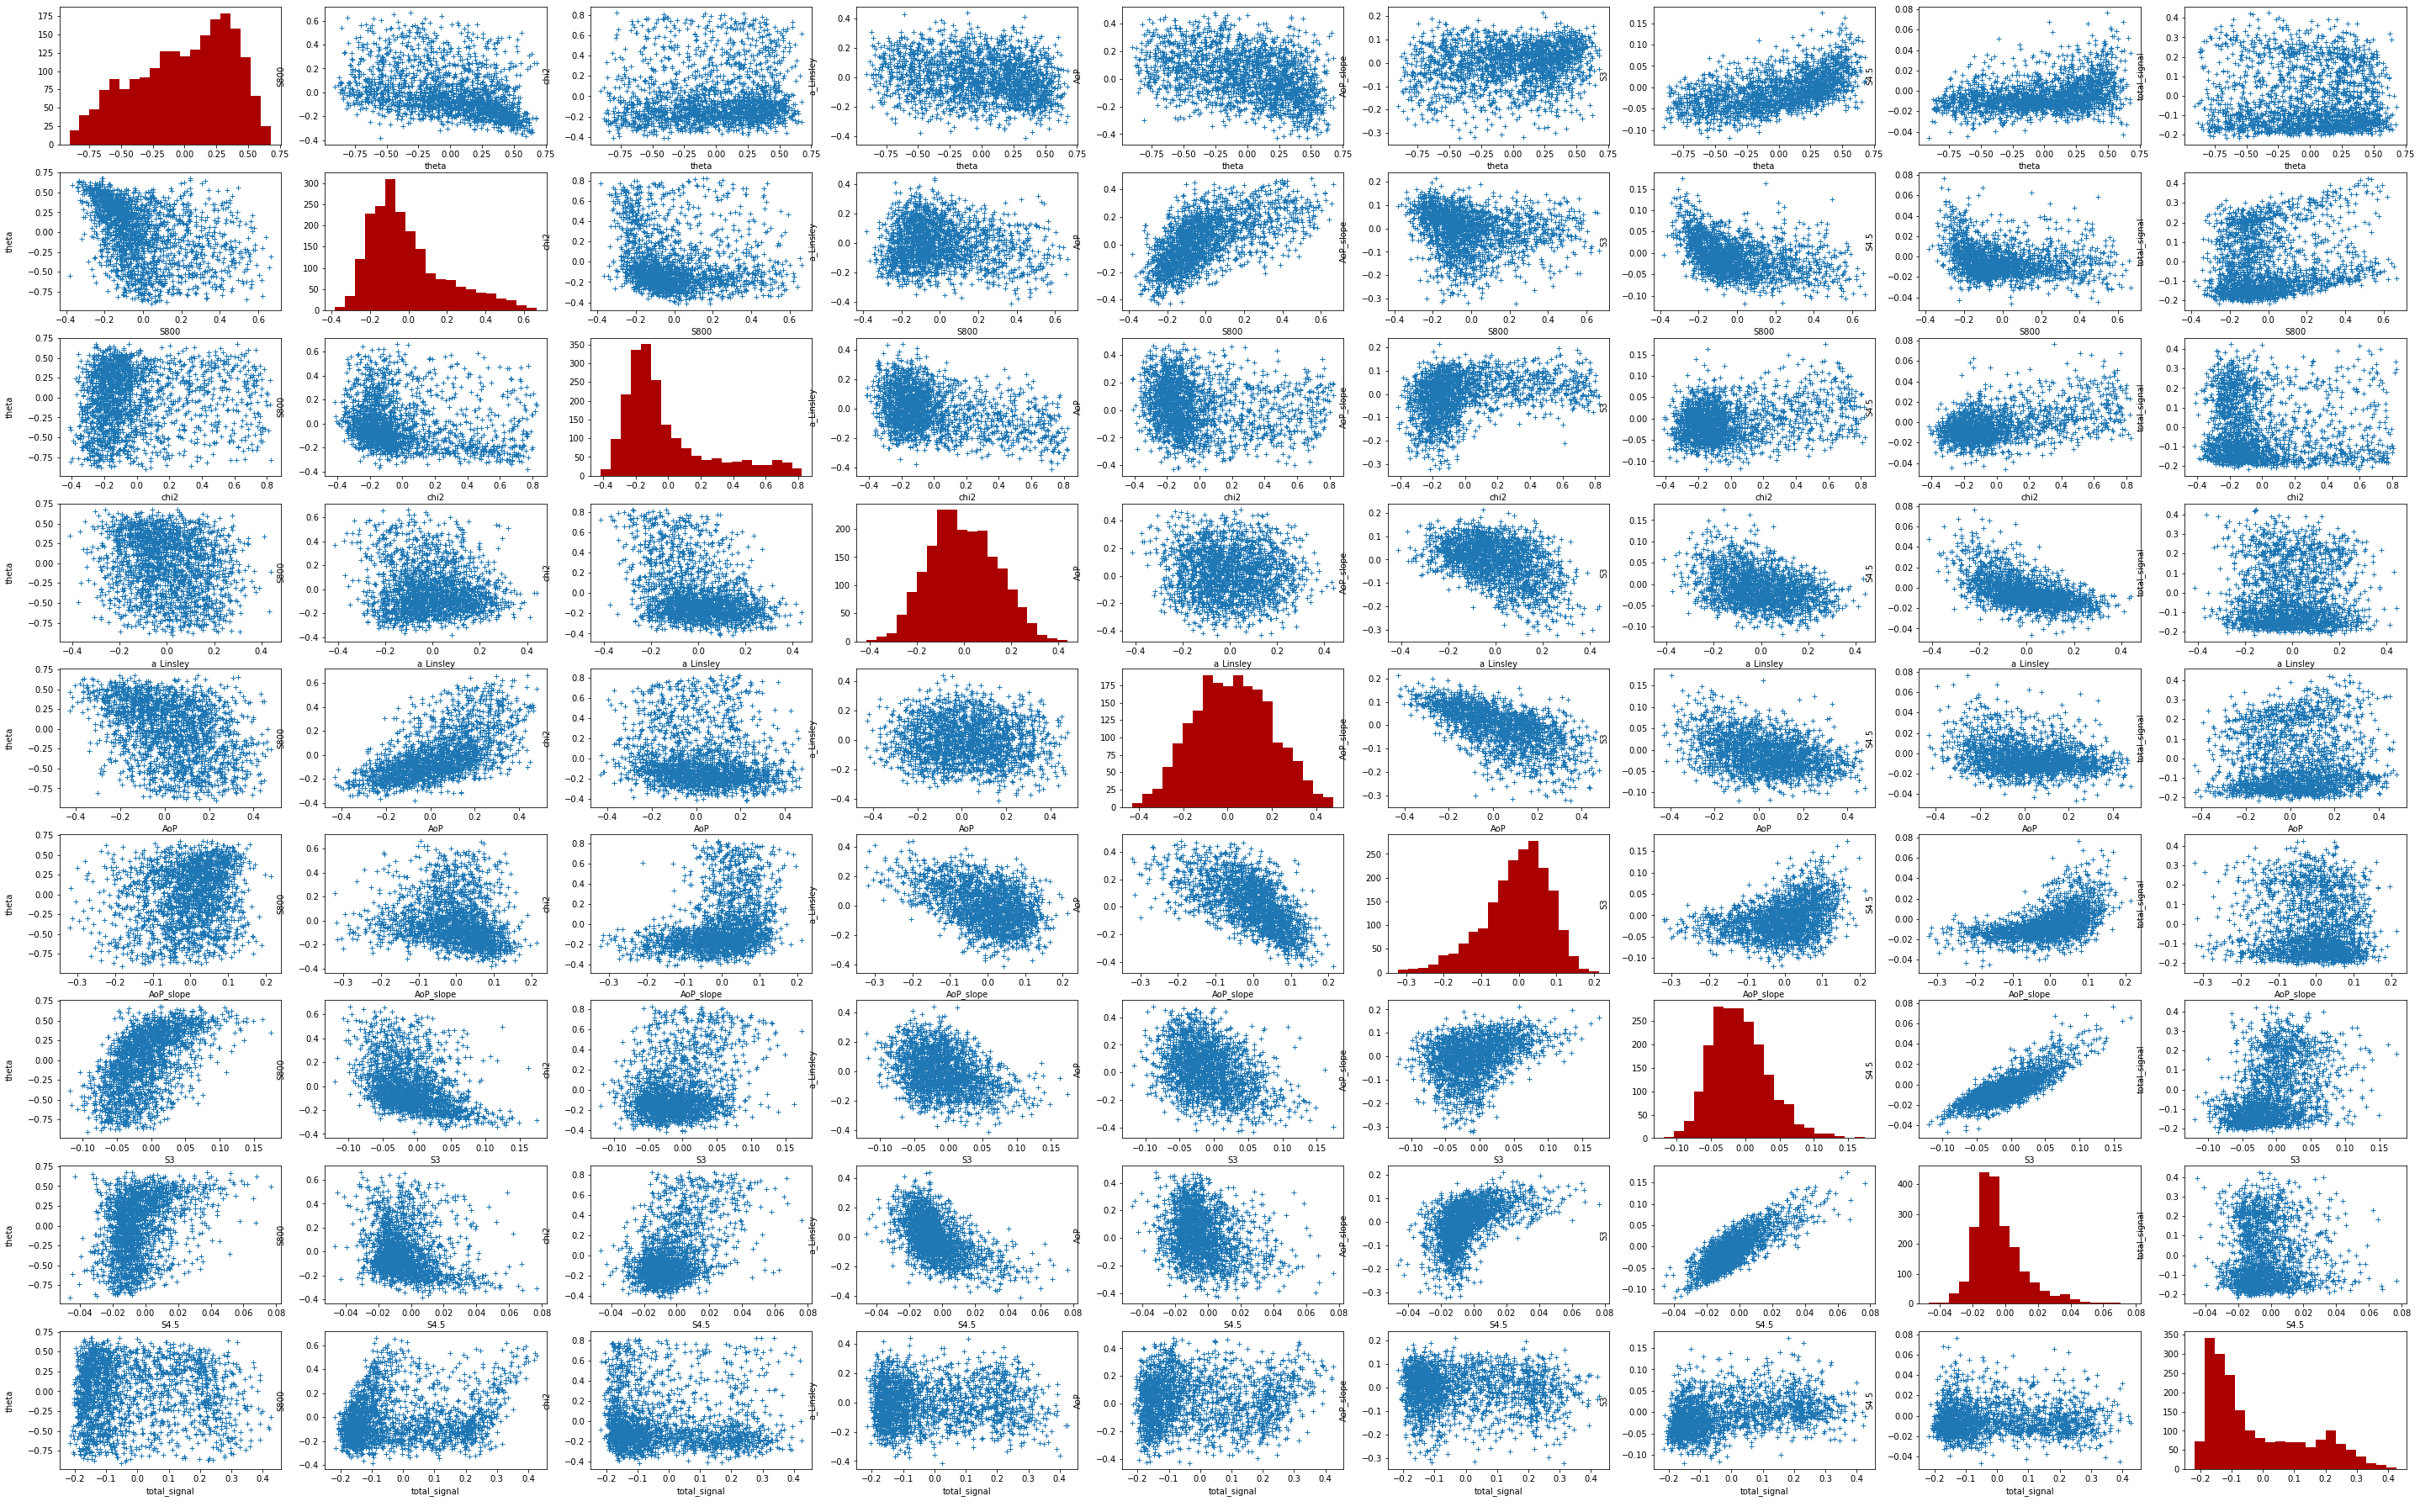

In [53]:
fake_data=generat_new_data(2000)
corr_name=name[:2]+name[4:11]
print(corr_name)
corr_plot(fake_data,corr_name)

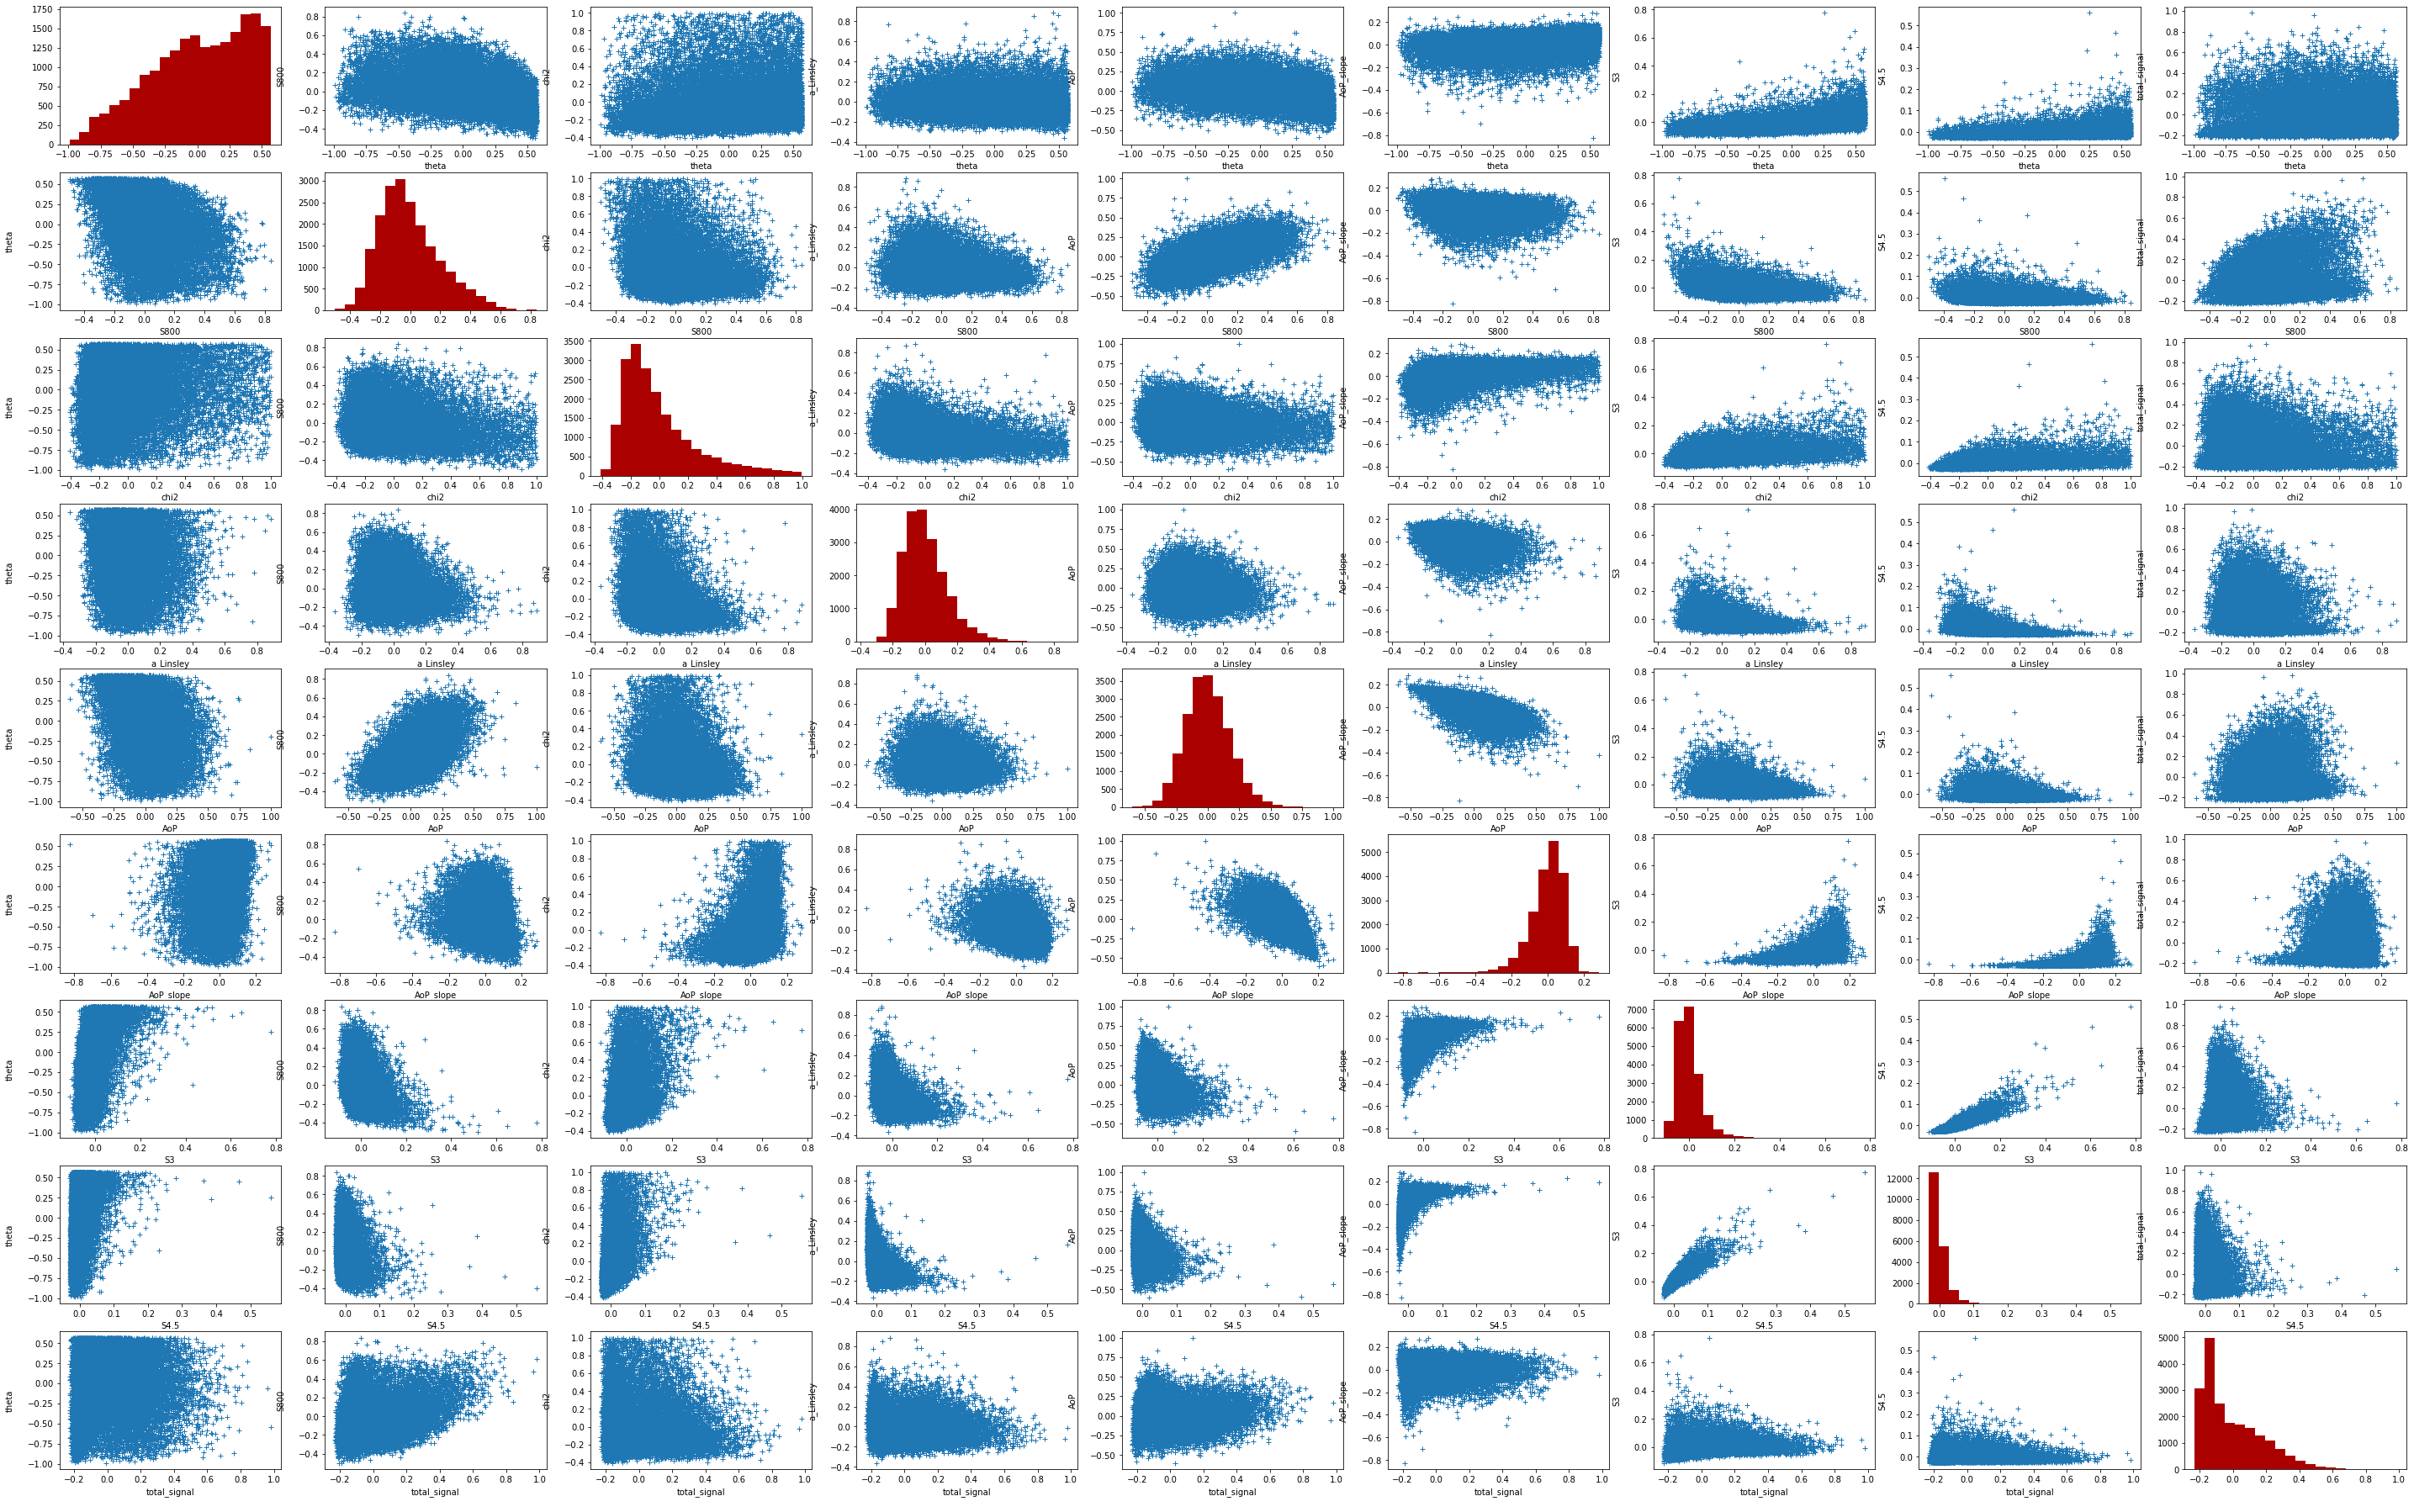

In [96]:
corr_plot(all_file[:20000],corr_name)

In [ ]:
noise1=tf.random.normal(shape=(batch,noise_dim))
fake1=generator(noise)
f_loss1=generator_loss(fake)
noise2=tf.random.normal(shape=(batch,noise_dim))
fake2=generator(noise)
f_loss2=generator_loss(fake)
c_loss=corr_loss(corr_real,1,8)
print(f_loss1)
print(c_loss)
c_loss=c.loss
print(f_loss1+f_loss2)

In [92]:
def train_step_corr(data,batch,show_loss=False):#len(data)=batch
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
      noise=tf.random.normal(shape=(batch,noise_dim))
      fake_data=generator(noise)

      real_output=discriminator(data,training=True)
      fake_output=discriminator(fake_data,training=True)

      disc_loss=discriminator_loss(real_output,fake_output)
        
      #change  
      data=fake_data.numpy()
      df=pd.DataFrame(data,columns=corr_name)
      corr_loss_step=corr_loss(corr_real,weight=1,number=batch,data=df)
      corr_loss_step=tf.cast(corr_loss_step,dtype=tf.float32)
      gen_loss=generator_loss(fake_output)+corr_loss_step
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  #print(gradients_of_discriminator,'\n\n\n')
  #print(discriminator.trainable_variables,'\n\n\n')

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  if show_loss:
    return ((disc_loss,gen_loss,corr_loss_step))



def train_corr(epochs,train_data,batch):
  #with pd.ExcelWriter('output_batch.xlsx',mode='wa') as writer:
    for i in tqdm_notebook(range(epochs),desc="all progrss"):
      k=0
      lim=len(train_data)//batch
      bar=lim//8
      for num in tqdm_notebook(range (0,len(train_data),batch),desc="in epoch number:"+str(i+1)):
        k+=1
        step_data=train_data[num:num+batch]
        reshape_step_data=np.reshape(step_data,(batch,l))
        (disc_loss,gen_loss,c_loss)=train_step_corr(reshape_step_data,batch,show_loss=True)
        disc_loss_list.append(disc_loss)
        gen_loss_list.append(gen_loss)
        c_loss_list.append(c_loss)
          
epochs=4
batch=1000
# c_loss_list=[]
train_corr(epochs,train_data,batch)

#batch не соответсвует степени 2
# изменить l-ray на более мелкий

,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
theta\n,0.000000,-0.001359,-0.035304,0.016614,-0.008763,-0.013682,0.015369,0.007206,0.006781
S800\n,-0.001359,0.000000,0.024166,0.018835,-0.001275,-0.001091,0.034814,0.043271,-0.028422
chi2\n,-0.035304,0.024166,0.000000,-0.002560,0.016323,0.021796,-0.064242,-0.008231,-0.005843
a_Linsley\n,0.016614,0.018835,-0.002560,0.000000,-0.023080,0.013509,-0.031895,-0.061024,0.047619
AoP\n,-0.008763,-0.001275,0.016323,-0.023080,0.000000,-0.010389,0.008838,0.017505,-0.042214
AoP_slope\n,-0.013682,-0.001091,0.021796,0.013509,-0.010389,0.000000,0.031771,0.054593,0.011575
S3\n,0.015369,0.034814,-0.064242,-0.031895,0.008838,0.031771,0.000000,0.002467,0.039564
S4.5\n,0.007206,0.043271,-0.008231,-0.061024,0.017505,0.054593,0.002467,0.000000,-0.009206
total_signal\n,0.006781,-0.028422,-0.005843,0.047619,-0.042214,0.011575,0.039564,-0.009206,0.000000


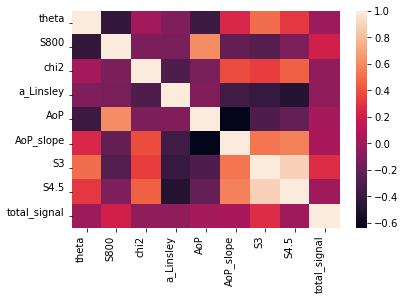

In [93]:
correlation(generat_new_data(5000),show=True)-correlation(all_file)

Text(0.5, 1.0, 'correlation loss')

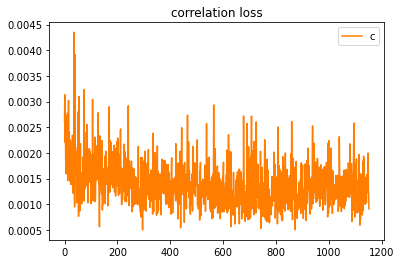

In [94]:
plt.plot(c_loss_list,"#FF7D00")
plt.legend("corr loss")
plt.title("correlation loss")

In [ ]:
fake_data=generat_new_data(2000)
corr_name=name[:2]+name[4:11]
print(corr_name)
corr_plot(fake_data,corr_name)

In [ ]:
# def test_disc(test_data,lim=1):
#   l= len(test_data)
#   print(test_data.shape)
#   fake_data=generat_new_data(l)
#   fake_data=fake_data.to_numpy()
#   k=0
#   for i in range(l):
#     real_output=discriminator(np.reshape(test_data[i],(1,9)))

#     fake_output=discriminator(np.reshape(fake_data[i],(1,9)))
#     if fake_output< real_output and fake_output<lim:
#       k+=1
#   print(k/l*100,"prosent")

# test_disc(test_data[:5000],lim=1)
    
  